##Tabla comparativa de los métodos utilizados con y sin PCA

| **Método**         | **Silhouette Score (con PCA)** | **Davies-Bouldin Index (con PCA)** | **Calinski-Harabasz Index (con PCA)** | **Silhouette Score (sin PCA)** | **Davies-Bouldin Index (sin PCA)** | **Calinski-Harabasz Index (sin PCA)** |
|--------------------|-------------------------------|-----------------------------------|-------------------------------------|-------------------------------|-----------------------------------|-------------------------------------|
| **GMM**            | 0.394                         | 1.170                             | 6.713                               | 0.371                         | 1.183                             | 5.518                               |
| **Agglomerative**  | 0.413                         | 1.956                             | 8.607                               | 0.260                         | 2.203                             | 7.770                               |
| **Spectral**       | 0.595                         | 0.280                             | 8.250                               | 0.568                         | 0.302                             | 7.474                               |


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

seed = [1234, 5678, 91011,49114865, 123456789, 1234567890, 1234567891, 1234567892, 1234567893, 1234567894]

# Cargar el archivo de datos
df = pd.read_excel('preprocesado/datos_dauco_solo.xlsx')

# Aplicar PCA para reducir la dimensionalidad 
X = df.drop(columns=['MenorID']).values # Eliminamos la columna 'MenorID' que no es relevante para PCA

# Normalizar los datos (opcional pero recomendado para PCA)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
components_to_retain = 32

# Reducir la dimensionalidad a los componentes seleccionados
pca = PCA(n_components=components_to_retain)
X_reduced = pca.fit_transform(X_scaled)

# Sin PCA funciona peor.
''' 
Los resultados sin PCA muestran un rendimiento más bajo,
como era de esperar, especialmente con el algoritmo Agglomerative, 
que tiene un Silhouette Score muy bajo y un Davies-Bouldin Index alto, 
lo que indica que los clusters no están bien separados.
Esto puede ser causado por el ruido o las relaciones no lineales en los datos sin la reducción de dimensionalidad.
'''
# X_reduced = X_scaled # Probamos con los datos sin reducir la dimensionalidad

' \nLos resultados sin PCA muestran un rendimiento más bajo,\ncomo era de esperar, especialmente con el algoritmo Agglomerative, \nque tiene un Silhouette Score muy bajo y un Davies-Bouldin Index alto, \nlo que indica que los clusters no están bien separados.\nEsto puede ser causado por el ruido o las relaciones no lineales en los datos sin la reducción de dimensionalidad.\n'

In [2]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan

# Diccionario para guardar resultados
resultados = {}

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X_reduced)
resultados['Agglomerative'] = labels_agg

# DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5)  # Puedes ajustar estos parámetros
labels_dbscan = dbscan.fit_predict(X_reduced)
resultados['DBSCAN'] = labels_dbscan

# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdbscan = clusterer.fit_predict(X_reduced)
resultados['HDBSCAN'] = labels_hdbscan

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
labels_gmm = gmm.fit_predict(X_reduced)
resultados['GMM'] = labels_gmm

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, assign_labels='kmeans', random_state=0)
labels_spectral = spectral.fit_predict(X_reduced)
resultados['Spectral'] = labels_spectral

# Evaluación
for name, labels in resultados.items():
    if len(set(labels)) > 1 and -1 not in set(labels):  # Silhouette solo si hay más de un grupo y sin "ruido"
        silhouette = silhouette_score(X_reduced, labels)
        db = davies_bouldin_score(X_reduced, labels)
        ch = calinski_harabasz_score(X_reduced, labels)
        print(f"{name}:\n  Silhouette Score: {silhouette:.3f}\n  Davies-Bouldin Index: {db:.3f}\n  Calinski-Harabasz Index: {ch:.3f}\n")
    else:
        print(f"{name} no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).")


Agglomerative:
  Silhouette Score: 0.413
  Davies-Bouldin Index: 1.956
  Calinski-Harabasz Index: 8.607

DBSCAN no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).
HDBSCAN no tiene clusters válidos para evaluación (posiblemente muchos -1 o solo un grupo).
GMM:
  Silhouette Score: 0.368
  Davies-Bouldin Index: 1.445
  Calinski-Harabasz Index: 8.402

Spectral:
  Silhouette Score: 0.575
  Davies-Bouldin Index: 0.288
  Calinski-Harabasz Index: 8.073



c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\alber\Desktop\Alberto\Trabajo de Fin de Máster\Trabajo-Fin-de-M-ster\Códigos\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


## Spectral Clustering

C:\Users\alber\AppData\Local\Temp\ipykernel_5076\180371489.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(affinities) * len(gammas))


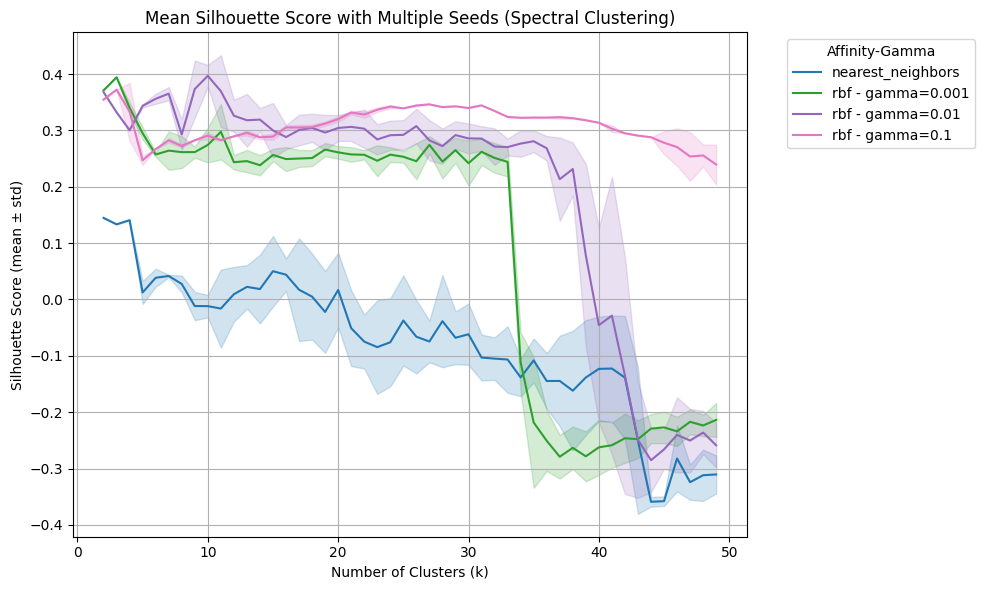

Mejor combinación: k=10, affinity=rbf, gamma=0.01 con media silhouette=0.3969


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
import numpy as np

# Rango de clusters y parámetros a evaluar
k_range = range(2, 50)
affinities = ['rbf', 'nearest_neighbors']
gammas = [0.001, 0.01, 0.1]  # solo aplica si affinity='rbf'
seeds = [1234, 5678, 91011, 49114865, 123456789, 1234567890, 1234567891, 1234567892, 1234567893, 1234567894]


# Diccionario para guardar resultados: (k, affinity, gamma) -> lista de scores
from collections import defaultdict
results = defaultdict(list)

for affinity in affinities:
    for gamma in gammas if affinity == 'rbf' else [None]:
        for k in k_range:
            for seed in seeds:
                try:
                    clustering_args = {
                        "n_clusters": k,
                        "affinity": affinity,
                        "assign_labels": 'kmeans',
                        "random_state": seed
                    }
                    if affinity == 'rbf':
                        clustering_args["gamma"] = gamma
                    
                    clustering = SpectralClustering(**clustering_args)
                    labels = clustering.fit_predict(X_reduced)
                    score = silhouette_score(X_reduced, labels)
                    results[(k, affinity, gamma)].append(score)
                except Exception as e:
                    print(f"Error con k={k}, affinity={affinity}, gamma={gamma}, seed={seed}: {e}")

# Preparar datos para graficar
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(affinities) * len(gammas))

# Obtener combinaciones únicas de (affinity, gamma)
param_combinations = sorted(set((a, g) for (_, a, g) in results.keys()))

for i, (affinity, gamma) in enumerate(param_combinations):
    k_vals = sorted(k for (k, a, g) in results if (a, g) == (affinity, gamma))
    means = [np.mean(results[(k, affinity, gamma)]) for k in k_vals]
    stds = [np.std(results[(k, affinity, gamma)]) for k in k_vals]

    label = f"{affinity} - gamma={gamma}" if affinity == 'rbf' else f"{affinity}"
    plt.plot(k_vals, means, label=label, color=colors(i))
    plt.fill_between(k_vals, np.array(means) - np.array(stds),
                     np.array(means) + np.array(stds), alpha=0.2, color=colors(i))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score (mean ± std)')
plt.title('Mean Silhouette Score with Multiple Seeds (Spectral Clustering)')
plt.legend(title='Affinity-Gamma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mejor combinación por media
best_key = max(results, key=lambda x: np.mean(results[x]))
best_mean = np.mean(results[best_key])
print(f"Mejor combinación: k={best_key[0]}, affinity={best_key[1]}, gamma={best_key[2]} con media silhouette={best_mean:.4f}")


Promedio de métricas (Spectral):
Silhouette Score: 0.397 ± 0.019
Davies-Bouldin Index: 1.328 ± 0.095
Calinski-Harabasz Index: 7.489 ± 0.164
Media de ARI: 0.768


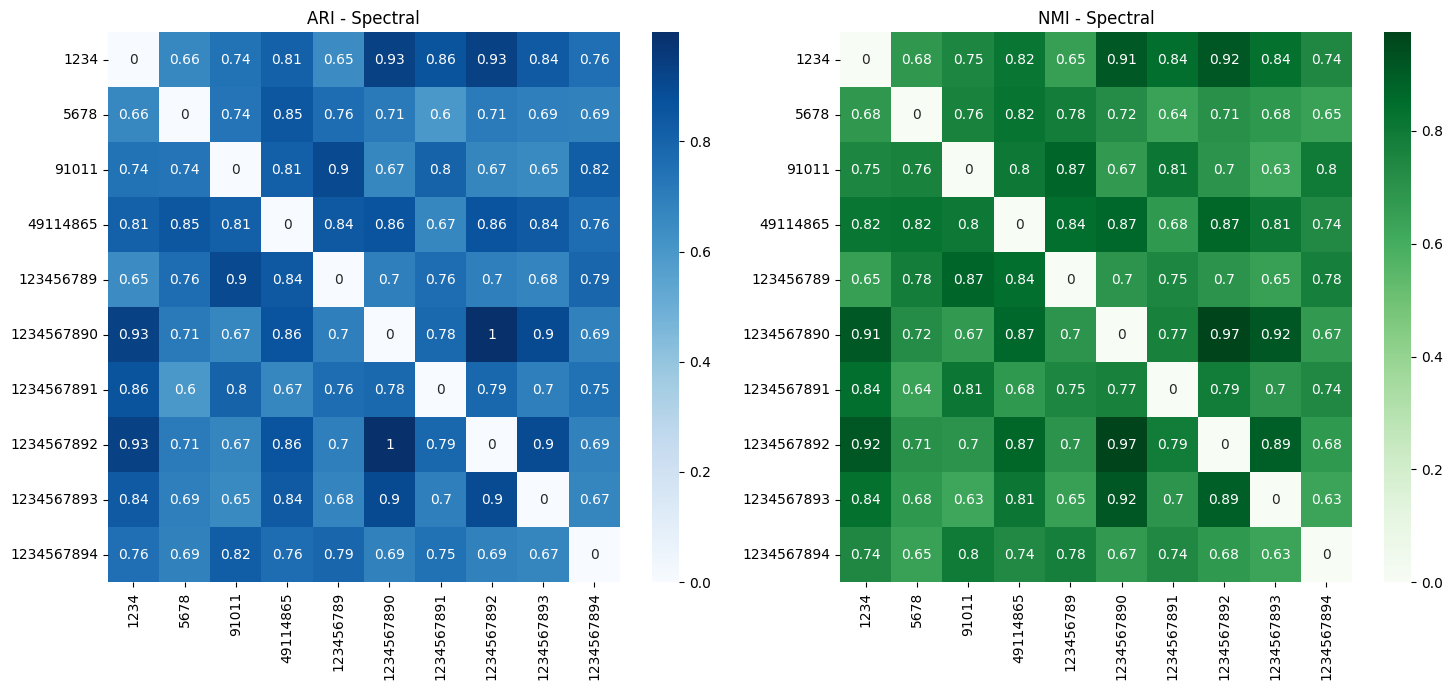

Media de NMI: 0.763


In [4]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from openpyxl.styles import PatternFill

num_clusters = 10
labels_dict = {}
metrics = []
colors = {
    0: "FFFF99", 1: "FFCC99", 2: "99CCFF", 3: "CCFF99", 4: "FF99CC",
    5: "FF6666", 6: "66FF66", 7: "6666FF", 8: "FF66FF"
}

for s in seeds:
    clustering = SpectralClustering(random_state=s, n_clusters=num_clusters, assign_labels='kmeans', affinity='rbf', gamma=0.01)
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels
    
    df['Cluster-Spectral'] = labels
    # Guardar DataFrame en Excel
    base_path = f'clusters/spectral/spectral_clustering_{num_clusters}_{s}_.xlsx'
    df.to_excel(base_path, index=False)

    # Colorear Excel
    wb = openpyxl.load_workbook(base_path)
    ws = wb.active
    cluster_col_idx = df.columns.get_loc('Cluster-Spectral') + 1

    for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
        cluster_val = row[cluster_col_idx - 1].value
        fill_color = colors.get(cluster_val, "FFFFFF")
        fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")
        for cell in row:
            cell.fill = fill

    wb.save(f'clusters/spectral/colored_spectral_clustering_{num_clusters}_{s}_.xlsx')

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (Spectral):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI
n = len(seeds)
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seeds[i]], labels_dict[seeds[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seeds[i]], labels_dict[seeds[j]])

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Blues")
plt.title("ARI - Spectral")

# media de valores ari sin contar la diagonal
ari_mean = ari_matrix[ari_matrix != 0].mean()
print(f"Media de ARI: {ari_mean:.3f}")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Greens")
plt.title("NMI - Spectral")
plt.tight_layout()
plt.show()

#media valores nmi sin contrar la diagonal
nmi_mean = nmi_matrix[nmi_matrix != 0].mean()
print(f"Media de NMI: {nmi_mean:.3f}")


## Agglomerative Clustering

### Silhouette Method

average - cosine: 100%|██████████| 48/48 [00:00<00:00, 207.30it/s]
C:\Users\alber\AppData\Local\Temp\ipykernel_5076\381527772.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(results))


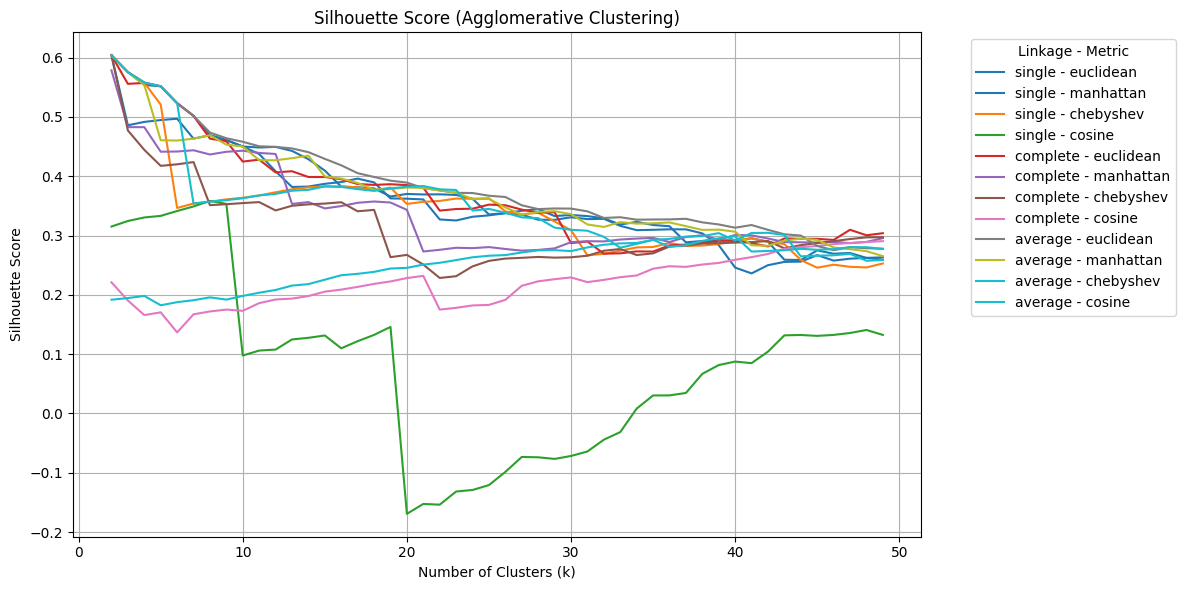

Mejor combinación por máximo: single - euclidean con silhouette máx = 0.6039 en k = 2


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from tqdm import tqdm

linkage_options = ['single', 'complete', 'average']
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'cosine']
k_range = range(2, 50)

results = {}

for linkage in linkage_options:
    for metric in metric_options:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        key = f"{linkage} - {metric}"
        silhouette_scores = []
        for k in tqdm(k_range, desc=key):
            try:
                model = AgglomerativeClustering(n_clusters=k, linkage=linkage, metric=metric)
                labels = model.fit_predict(X_reduced)
                score = silhouette_score(X_reduced, labels)
                silhouette_scores.append(score)
            except Exception:
                silhouette_scores.append(np.nan)
        results[key] = silhouette_scores

# Graficar sin bandas de desviación estándar (solo curvas)
plt.figure(figsize=(12, 6))
colors = plt.cm.get_cmap('tab10', len(results))

for i, (key, scores) in enumerate(results.items()):
    plt.plot(k_range, scores, label=key, color=colors(i))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Agglomerative Clustering)')
plt.legend(title='Linkage - Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
# # Mejor combinación por media
# best_key_mean = max(results, key=lambda x: np.nanmean(results[x]))
# best_mean = np.nanmean(results[best_key_mean])
# print(f"Mejor combinación por media: {best_key_mean} con silhouette media = {best_mean:.4f}")

# Mejor combinación por máximo
best_key_max = max(results, key=lambda x: np.nanmax(results[x]))
best_max = np.nanmax(results[best_key_max])
best_k_max = np.nanargmax(results[best_key_max]) + 2  # k_range empieza en 2
print(f"Mejor combinación por máximo: {best_key_max} con silhouette máx = {best_max:.4f} en k = {best_k_max}")



Promedio de métricas (Agglomerative):
Silhouette Score: 0.502 ± 0.000
Davies-Bouldin Index: 0.301 ± 0.000
Calinski-Harabasz Index: 7.875 ± 0.000
Media de ARI: 1.000


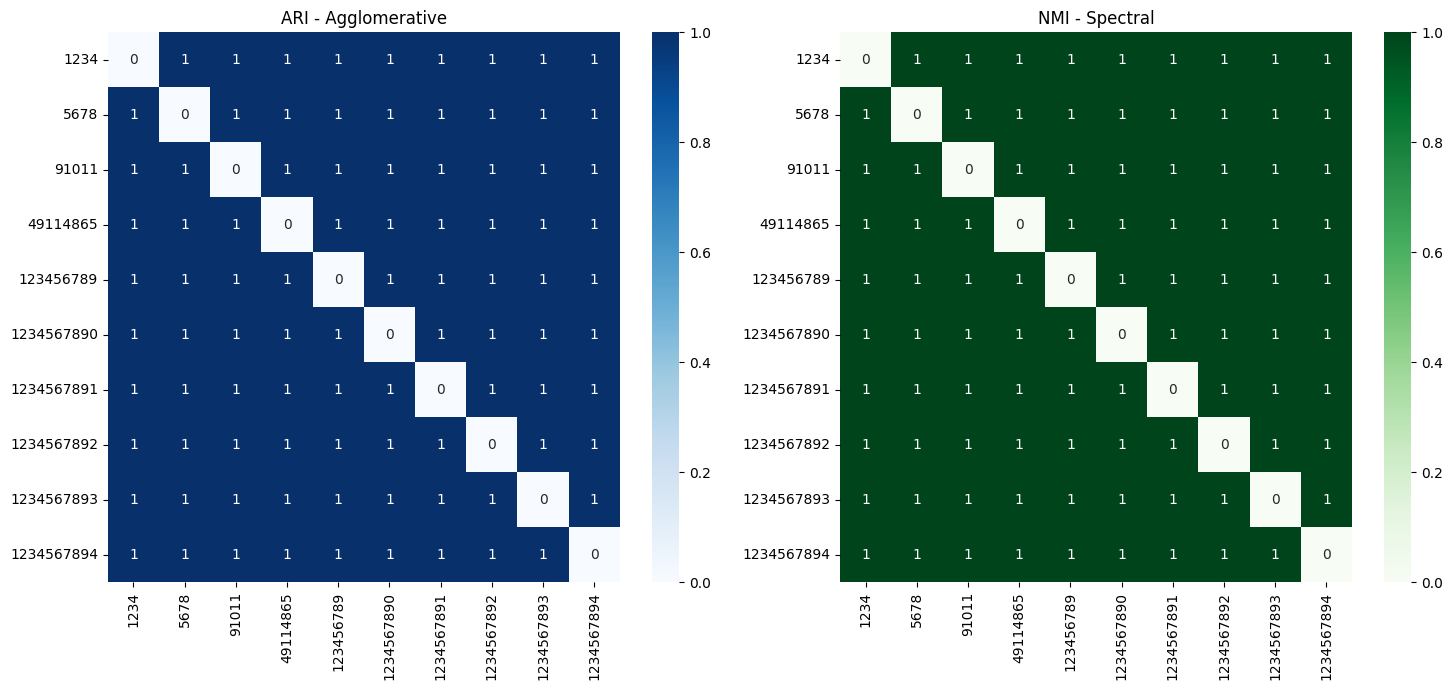

Media de NMI: 1.000


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

labels_dict = {}
metrics = []

for s in seeds:
    clustering = AgglomerativeClustering(n_clusters=2, linkage='single', metric='euclidean')
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (Agglomerative):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI
n = len(seeds)
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seeds[i]], labels_dict[seeds[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seeds[i]], labels_dict[seeds[j]])

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Blues")
plt.title("ARI - Agglomerative")

# media de valores ari sin contar la diagonal
ari_mean = ari_matrix[ari_matrix != 0].mean()
print(f"Media de ARI: {ari_mean:.3f}")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Greens")
plt.title("NMI - Spectral")
plt.tight_layout()
plt.show()

#media valores nmi sin contrar la diagonal
nmi_mean = nmi_matrix[nmi_matrix != 0].mean()
print(f"Media de NMI: {nmi_mean:.3f}")

## Gaussian Mixture Model

C:\Users\alber\AppData\Local\Temp\ipykernel_5076\2294057290.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(results))


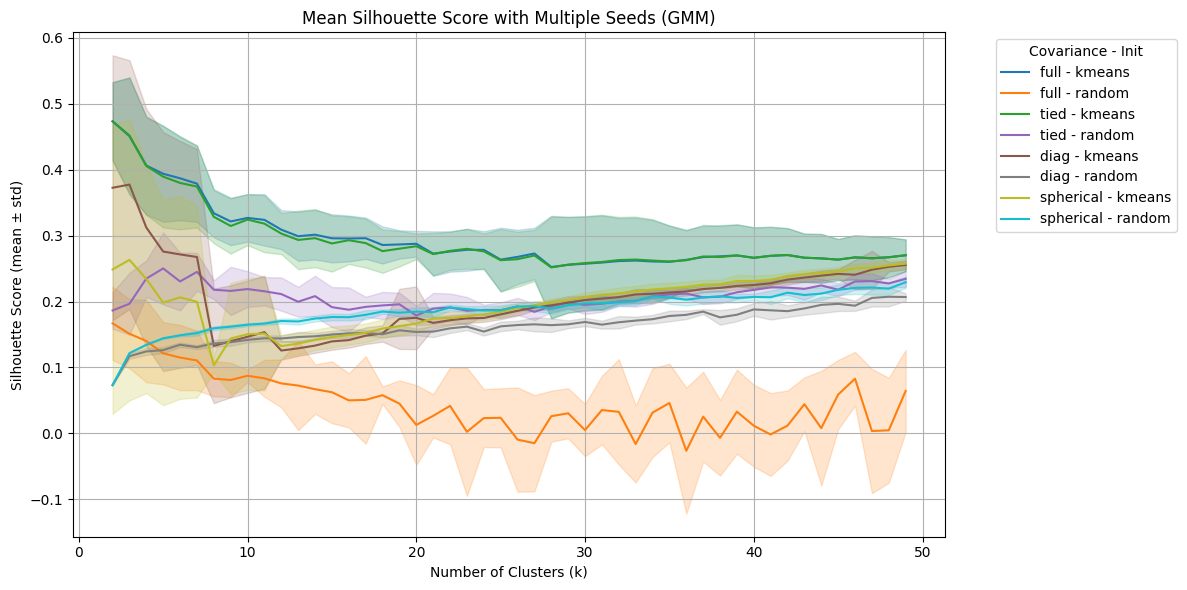

Mejor combinación por máximo: k=2, covariance_type=full, init=kmeans, silhouette máx = 0.4735


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from collections import defaultdict

# Configuraciones a evaluar
k_range = range(2, 50)
covariance_types = ['full', 'tied', 'diag', 'spherical']
init_methods = ['kmeans', 'random']

# Diccionario para almacenar resultados: (cov_type, init) -> {k -> [scores]}
results = defaultdict(lambda: defaultdict(list))

for cov_type in covariance_types:
    for init in init_methods:
        for k in k_range:
            for seed in seeds:
                try:
                    gmm = GaussianMixture(
                        n_components=k,
                        covariance_type=cov_type,
                        init_params=init,
                        random_state=seed
                    )
                    labels = gmm.fit_predict(X_reduced)
                    score = silhouette_score(X_reduced, labels)
                    results[(cov_type, init)][k].append(score)
                except:
                    continue

# Preparar gráfico
plt.figure(figsize=(12, 6))
colors = plt.cm.get_cmap('tab10', len(results))

for i, ((cov_type, init), scores_dict) in enumerate(results.items()):
    ks = sorted(scores_dict.keys())
    means = [np.mean(scores_dict[k]) for k in ks]
    stds = [np.std(scores_dict[k]) for k in ks]
    
    label = f"{cov_type} - {init}"
    plt.plot(ks, means, label=label, color=colors(i))
    plt.fill_between(ks, np.array(means) - np.array(stds),
                     np.array(means) + np.array(stds), alpha=0.2, color=colors(i))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score (mean ± std)')
plt.title('Mean Silhouette Score with Multiple Seeds (GMM)')
plt.legend(title='Covariance - Init', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar mejor combinación por media
flat_results = []
for (cov_type, init), scores_dict in results.items():
    for k, score_list in scores_dict.items():
        if score_list:
            flat_results.append((k, cov_type, init, np.mean(score_list)))

best_result = max(flat_results, key=lambda x: x[3])
best_k, best_cov, best_init, best_score = best_result
best_result_str = f"Mejor combinación: k={best_k}, covariance_type={best_cov}, init={best_init}, silhouette media = {best_score:.4f}"
best_result_str
# Mostrar mejor combinación por máximo
best_result_max = max(flat_results, key=lambda x: x[3])
best_k_max = best_result_max[0]
best_cov_max = best_result_max[1]
best_init_max = best_result_max[2]
best_score_max = best_result_max[3]
best_result_max_str = f"Mejor combinación por máximo: k={best_k_max}, covariance_type={best_cov_max}, init={best_init_max}, silhouette máx = {best_score_max:.4f}"
print(best_result_max_str)

Promedio de métricas (GMM):
Silhouette Score: 0.474 ± 0.059
Davies-Bouldin Index: 1.382 ± 0.984
Calinski-Harabasz Index: 6.650 ± 1.958
Media de ARI: 0.090


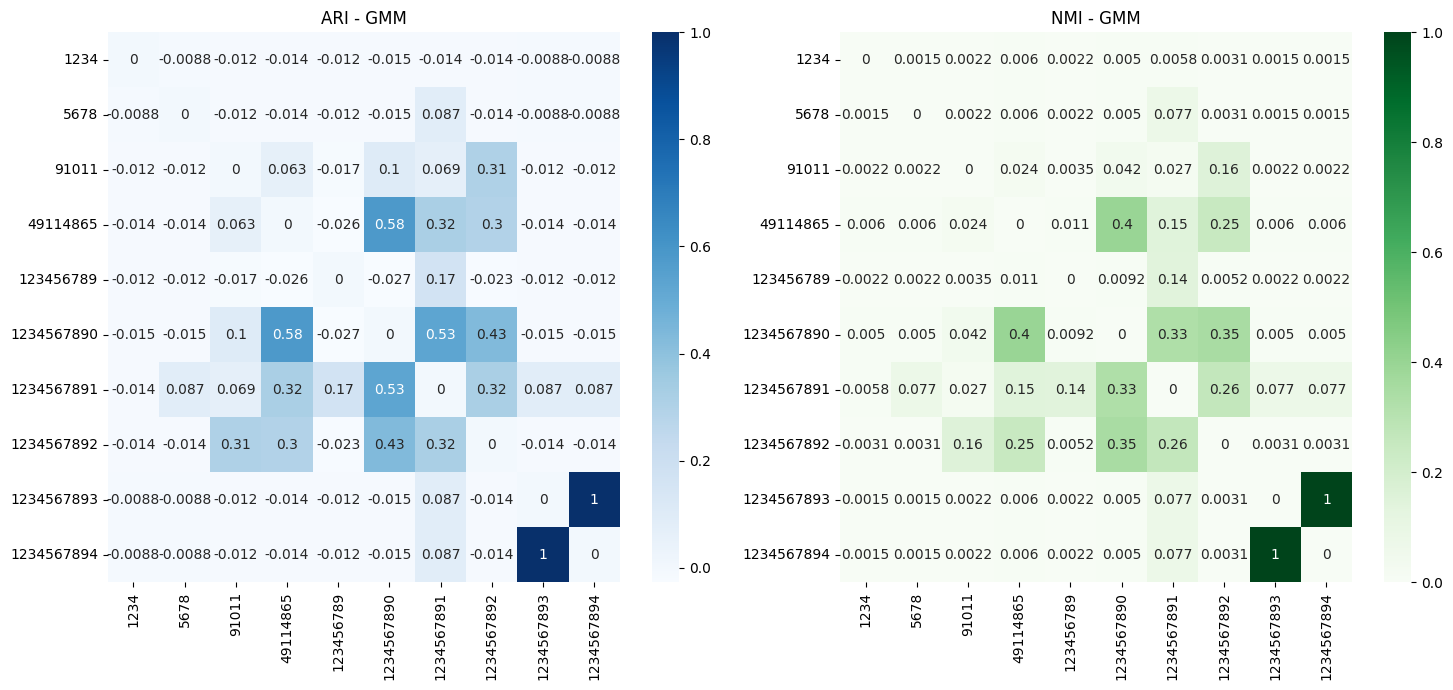

Media de NMI: 0.077


In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from openpyxl.styles import PatternFill

num_clusters = best_k_max  # Usar el mejor número de clusters encontrado
labels_dict = {}
metrics = []
colors = {
    0: "FFFF99", 1: "FFCC99", 2: "99CCFF", 3: "CCFF99", 4: "FF99CC",
    5: "FF6666", 6: "66FF66", 7: "6666FF", 8: "FF66FF"
}

for s in seeds:
    clustering = GaussianMixture(
                        n_components=best_k_max,
                        covariance_type=best_cov_max,
                        init_params=best_init_max,
                        random_state=s
                    )
    labels = clustering.fit_predict(X_reduced)
    labels_dict[s] = labels
    
    df['Cluster-GMM'] = labels
    # Guardar DataFrame en Excel
    base_path = f'clusters/gmm/gmm_{num_clusters}_{s}_.xlsx'
    df.to_excel(base_path, index=False)

    # Colorear Excel
    wb = openpyxl.load_workbook(base_path)
    ws = wb.active
    cluster_col_idx = df.columns.get_loc('Cluster-GMM') + 1

    for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
        cluster_val = row[cluster_col_idx - 1].value
        fill_color = colors.get(cluster_val, "FFFFFF")
        fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")
        for cell in row:
            cell.fill = fill

    wb.save(f'clusters/gmm/colored_gmm_{num_clusters}_{s}_.xlsx')

    silhouette = silhouette_score(X_reduced, labels)
    db_index = davies_bouldin_score(X_reduced, labels)
    ch_index = calinski_harabasz_score(X_reduced, labels)
    metrics.append((silhouette, db_index, ch_index))

metrics_array = np.array(metrics)
print("Promedio de métricas (GMM):")
print(f"Silhouette Score: {metrics_array[:,0].mean():.3f} ± {metrics_array[:,0].std():.3f}")
print(f"Davies-Bouldin Index: {metrics_array[:,1].mean():.3f} ± {metrics_array[:,1].std():.3f}")
print(f"Calinski-Harabasz Index: {metrics_array[:,2].mean():.3f} ± {metrics_array[:,2].std():.3f}")

# ARI y NMI
n = len(seeds)
ari_matrix = np.zeros((n, n))
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            ari_matrix[i, j] = adjusted_rand_score(labels_dict[seeds[i]], labels_dict[seeds[j]])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seeds[i]], labels_dict[seeds[j]])

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.heatmap(ari_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Blues")
plt.title("ARI - GMM")

# media de valores ari sin contar la diagonal
ari_mean = ari_matrix[ari_matrix != 0].mean()
print(f"Media de ARI: {ari_mean:.3f}")

plt.subplot(1, 2, 2)
sns.heatmap(nmi_matrix, annot=True, xticklabels=seeds, yticklabels=seeds, cmap="Greens")
plt.title("NMI - GMM")
plt.tight_layout()
plt.show()

#media valores nmi sin contrar la diagonal
nmi_mean = nmi_matrix[nmi_matrix != 0].mean()
print(f"Media de NMI: {nmi_mean:.3f}")
